<a href="https://colab.research.google.com/github/rafiechautie/Autism-detector-for-children/blob/main/Machine-Learning/ASD%20Screening/ASD_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from keras.models import save_model

# Import Data

In [2]:
autism_screening = pd.read_csv('/content/autism screening.csv')

In [3]:
autism_screening

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,'United Kingdom',no,10,'4-11 years',Parent,YES
288,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,yes,Australia,no,4,'4-11 years',Parent,NO
289,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,no,Brazil,no,7,'4-11 years',Parent,YES
290,1,1,1,0,1,1,1,1,1,1,...,m,'South Asian',no,no,India,no,9,'4-11 years',Parent,YES


# EDA

In [4]:
autism_screening.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         292 non-null    int64 
 1   A2_Score         292 non-null    int64 
 2   A3_Score         292 non-null    int64 
 3   A4_Score         292 non-null    int64 
 4   A5_Score         292 non-null    int64 
 5   A6_Score         292 non-null    int64 
 6   A7_Score         292 non-null    int64 
 7   A8_Score         292 non-null    int64 
 8   A9_Score         292 non-null    int64 
 9   A10_Score        292 non-null    int64 
 10  age              292 non-null    object
 11  gender           292 non-null    object
 12  ethnicity        292 non-null    object
 13  jundice          292 non-null    object
 14  austim           292 non-null    object
 15  contry_of_res    292 non-null    object
 16  used_app_before  292 non-null    object
 17  result           292 non-null    in

In [5]:
autism_screening.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [6]:
autism_screening.shape

(292, 21)

In [7]:
autism_screening['Class/ASD'].value_counts()

NO     151
YES    141
Name: Class/ASD, dtype: int64

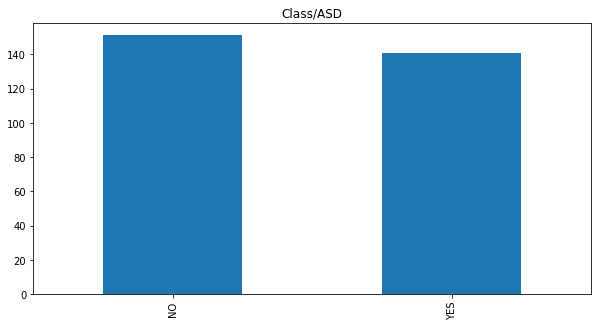

In [8]:
plt.figure(figsize=(10,5))
autism_screening['Class/ASD'].value_counts().plot.bar()
plt.title("Class/ASD")
plt.show()

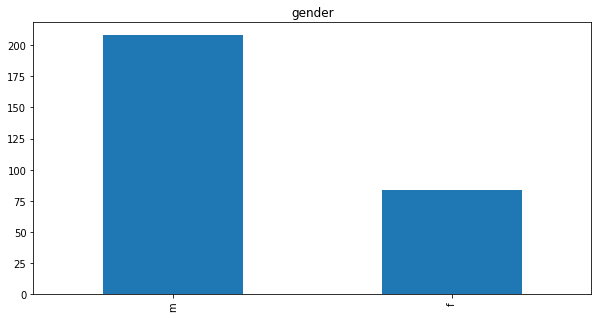

In [9]:
plt.figure(figsize=(10,5))
autism_screening['gender'].value_counts().plot.bar()
plt.title("gender")
plt.show()

In [10]:
autism_screening['ethnicity'].value_counts()

White-European       108
Asian                 46
?                     43
'Middle Eastern '     27
'South Asian'         21
Others                14
Black                 14
Latino                 8
Hispanic               7
Pasifika               2
Turkish                2
Name: ethnicity, dtype: int64

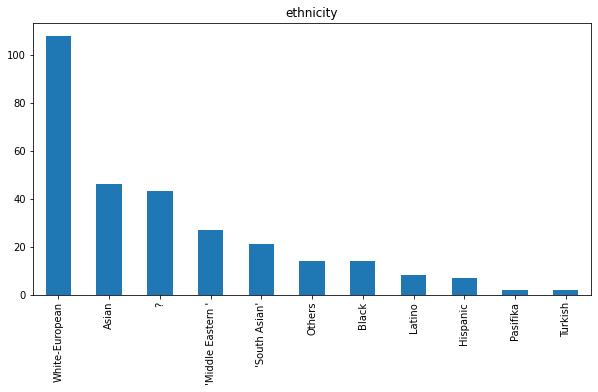

In [11]:
plt.figure(figsize=(10,5))
autism_screening['ethnicity'].value_counts().plot.bar()
plt.title("ethnicity")
plt.show()

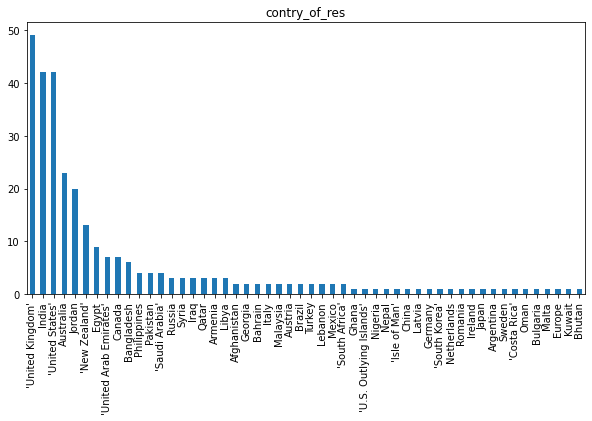

In [12]:
plt.figure(figsize=(10,5))
autism_screening['contry_of_res'].value_counts().plot.bar()
plt.title('contry_of_res')
plt.show()

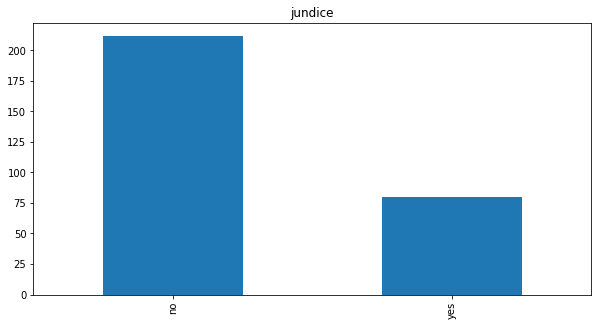

In [13]:
plt.figure(figsize=(10,5))
autism_screening['jundice'].value_counts().plot.bar()
plt.title('jundice')
plt.show()

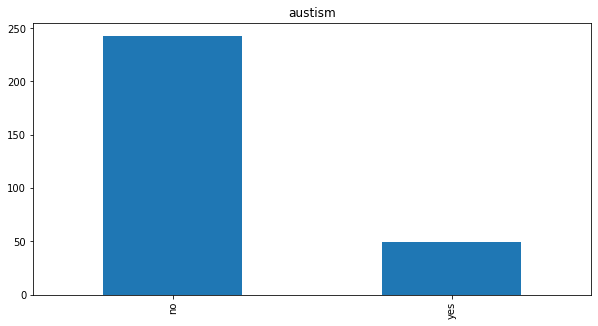

In [14]:
plt.figure(figsize=(10,5))
autism_screening['austim'].value_counts().plot.bar()
plt.title('austism')
plt.show()

In [15]:
autism_screening.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

# Preprocessing

Drop Coloumn, Missing Value, and Replace Data

In [16]:
data = autism_screening.drop(['age','used_app_before', 'result', 'age_desc', 'relation', 'contry_of_res'], axis=1)

In [17]:
data.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
gender       0
ethnicity    0
jundice      0
austim       0
Class/ASD    0
dtype: int64

In [18]:
data.replace("?",'Others',inplace=True)

In [19]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,m,Others,no,no,NO
1,1,1,0,0,1,1,0,1,0,0,m,'Middle Eastern ',no,no,NO
2,1,1,0,0,0,1,1,1,0,0,m,Others,no,no,NO
3,0,1,0,0,1,1,0,0,0,1,f,Others,yes,no,NO
4,1,1,1,1,1,1,1,1,1,1,m,Others,yes,no,YES


In [20]:
data['gender'] = LabelEncoder().fit_transform(data['gender'])
data['ethnicity'] = LabelEncoder().fit_transform(data['ethnicity'])
data['jundice'] = LabelEncoder().fit_transform(data['jundice'])
data['austim'] = LabelEncoder().fit_transform(data['austim'])
data['Class/ASD'] = LabelEncoder().fit_transform(data['Class/ASD'])

In [21]:
data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,1,6,0,0,0
1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0
2,1,1,0,0,0,1,1,1,0,0,1,6,0,0,0
3,0,1,0,0,1,1,0,0,0,1,0,6,1,0,0
4,1,1,1,1,1,1,1,1,1,1,1,6,1,0,1


In [22]:
x = data.drop(['Class/ASD'], 1)
y = data['Class/ASD']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


# Split Data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(233, 14) (233,) (59, 14) (59,)


In [24]:
y_train.value_counts()

0    123
1    110
Name: Class/ASD, dtype: int64

In [25]:
y_test.value_counts()

1    31
0    28
Name: Class/ASD, dtype: int64

# Modeling

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=50, verbose=2, validation_steps=10, validation_split=0.2) 

Epoch 1/50
6/6 - 2s - loss: 0.7516 - accuracy: 0.5054 - val_loss: 0.6799 - val_accuracy: 0.5319 - 2s/epoch - 340ms/step
Epoch 2/50
6/6 - 0s - loss: 0.6709 - accuracy: 0.6022 - val_loss: 0.6523 - val_accuracy: 0.5745 - 151ms/epoch - 25ms/step
Epoch 3/50
6/6 - 0s - loss: 0.6428 - accuracy: 0.5860 - val_loss: 0.6351 - val_accuracy: 0.5532 - 114ms/epoch - 19ms/step
Epoch 4/50
6/6 - 0s - loss: 0.6221 - accuracy: 0.6828 - val_loss: 0.6078 - val_accuracy: 0.7660 - 136ms/epoch - 23ms/step
Epoch 5/50
6/6 - 0s - loss: 0.5981 - accuracy: 0.8065 - val_loss: 0.5886 - val_accuracy: 0.8298 - 149ms/epoch - 25ms/step
Epoch 6/50
6/6 - 0s - loss: 0.5797 - accuracy: 0.8226 - val_loss: 0.5689 - val_accuracy: 0.8511 - 88ms/epoch - 15ms/step
Epoch 7/50
6/6 - 0s - loss: 0.5626 - accuracy: 0.8333 - val_loss: 0.5483 - val_accuracy: 0.8936 - 78ms/epoch - 13ms/step
Epoch 8/50
6/6 - 0s - loss: 0.5379 - accuracy: 0.8548 - val_loss: 0.5268 - val_accuracy: 0.8723 - 130ms/epoch - 22ms/step
Epoch 9/50
6/6 - 0s - loss: 

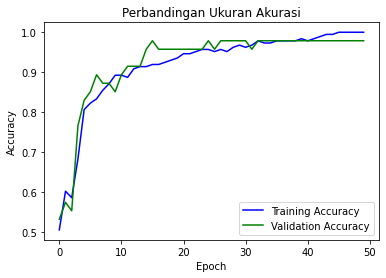

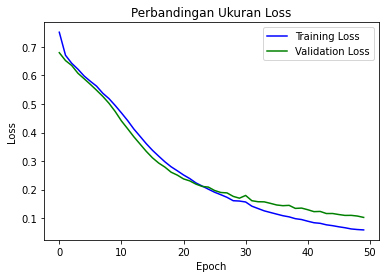

<Figure size 432x288 with 0 Axes>

In [30]:
# Plot the results
epochs = range(len(history.history['accuracy']))

#Plot training and validation accuracy per epoch
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs, history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
plt.title('Perbandingan Ukuran Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

# Evaluation

In [31]:
pred = model.predict(x_test)
pred = [round(x[0]) for x in pred]

In [32]:
print('accuracy score: ', accuracy_score(y_test, pred))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

accuracy score:  0.9661016949152542


Confusion Matrix: 
 [[27  1]
 [ 1 30]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        31

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



# Save Model + Deploy

In [35]:
saved_model = save_model(model, '/content/ModelASD.h5')

In [38]:
# Convert Model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('ASD.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpv1__seii/assets


INFO:tensorflow:Assets written to: /tmp/tmpv1__seii/assets
